In [ ]:
from shapely.geometry import Polygon, Point


points = [
    [
        408.2615702479339,
        460.2808112324493
    ],
    [
        416.24834710743806,
        865.6474258970359
    ],
    [
        493.12107438016534,
        854.6645865834633
    ],
    [
        574.9855371900827,
        852.6677067082684
    ],
    [
        632.8896694214876,
        848.6739469578783
    ],
    [
        632.8896694214876,
        812.7301092043682
    ],
    [
        658.846694214876,
        808.7363494539782
    ],
    [
        657.848347107438,
        850.6708268330733
    ],
    [
        755.6863636363637,
        839.6879875195008
    ],
    [
        861.5111570247934,
        848.6739469578783
    ],
    [
        855.5210743801654,
        451.2948517940718
    ]
]

poly = Polygon(points)


poly
# point_to_buffer = None
point_to_buffer =  (
        493.12107438016534,
        854.6645865834633
)

buffer_distance = -50

buffered_points = []


for item in poly.exterior.coords:
    if item == point_to_buffer:
        buffered_points.append(Point(item).buffer(buffer_distance, cap_style='flat'))
    else:
        buffered_points.append(Point(item))


buffered_polygon = Polygon([p.exterior.coords[0] if isinstance(p, Polygon) and not p.is_empty else (p.x, p.y) for p in buffered_points if isinstance(p, Point) and p.is_valid])

buffered_polygon

In [ ]:
from shapely import Polygon , Point

points = [
        [
            883.3486009327115,
            608.5942704863425
        ],
        [
            423.65506329113924,
            669.5536309127248
        ],
        [
            442.6424050632911,
            874.417055296469
        ],
        [
            802.4025649566955,
            824.4503664223851
        ],
        [
            801.4032311792138,
            723.5176548967355
        ],
        [
            882.3492671552298,
            711.5256495669553
        ],
        [
            883.3486009327115,
            608.5942704863425
        ]
    ]


polygon = Polygon(points)

polygon.area
# offset_polygon = polygon.buffer(-30, cap_style ='flat', join_style='mitre')
conversion_factor = 10  # Replace with your actual conversion factor

# # Calculate the area in square feet
area_in_sqft = (polygon.area / (conversion_factor ** 2))

area_in_sqft
# offset_polygon
# points = offset_polygon.exterior.coords

# list(points)

In [ ]:
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

# Create a sample 6-point polygon (you can replace with your own coordinates)
points = [
    [0, 0],    # 1st point
    [0, 100],  # 2nd point
    [50, 150], # 3rd point
    [100, 100],# 4th point
    [100, 0],  # 5th point (where we'll add buffer)
    [0, 0]     # 6th point (same as first to close polygon)
]

# Create the original polygon
original_polygon = Polygon(points)

# Define buffer distance for the 5th point
buffer_distance = 30  # Adjust this value as needed

# Create buffer around the 5th point (index 4 since we start at 0)
fifth_point = Point(points[4])  # 5th point
buffered_area = fifth_point.buffer(buffer_distance)

# Combine the original polygon with the buffer
result = original_polygon.union(buffered_area)

# Visualization function
def plot_polygons(original, buffered, buffer_point):
    fig, ax = plt.subplots()
    
    # Plot original polygon
    x, y = original.exterior.xy
    ax.plot(x, y, 'b-', label='Original Polygon')
    
    # Plot buffered result
    x, y = buffered.exterior.xy
    ax.plot(x, y, 'r-', label='Buffered Result')
    
    # Plot the buffered point location
    ax.plot(buffer_point.x, buffer_point.y, 'go', label='5th Point')
    
    ax.set_aspect('equal')
    ax.legend()
    plt.title('Polygon with Buffer on 5th Point')
    plt.show()

# Show the result
plot_polygons(original_polygon, result, fifth_point)

# Print information
print(f"Original area: {original_polygon.area:.2f}")
print(f"Buffered area: {result.area:.2f}")
print("\nBuffered polygon coordinates:")
for coord in result.exterior.coords:
    print(f"({coord[0]:.2f}, {coord[1]:.2f})")

In [ ]:
from shapely.geometry import Polygon, Point, LineString
import numpy as np

# Given points
points = [
    [
        408.2615702479339,
        460.2808112324493
    ],
    [
        416.24834710743806,
        865.6474258970359
    ],
    [
        493.12107438016534,
        854.6645865834633
    ],
    [
        574.9855371900827,
        852.6677067082684
    ],
    [
        632.8896694214876,
        848.6739469578783
    ],
    [
        632.8896694214876,
        812.7301092043682
    ],
    [
        658.846694214876,
        808.7363494539782
    ],
    [
        657.848347107438,
        850.6708268330733
    ],
    [
        755.6863636363637,
        839.6879875195008
    ],
    [
        861.5111570247934,
        848.6739469578783
    ],
    [
        855.5210743801654,
        451.2948517940718
    ]
]

# Create a polygon
poly = Polygon(points)

# Point to buffer
point_to_buffer = (493.12107438016534, 854.6645865834633)

# Buffer distance
buffer_distance = -10

# Find the index of the point in the polygon's exterior coordinates
exterior_coords = list(poly.exterior.coords)[:-1]  # Exclude the last point which is the same as the first
point_index = exterior_coords.index(point_to_buffer)

# Get the previous and next points
prev_point = exterior_coords[(point_index - 1) % len(exterior_coords)]
next_point = exterior_coords[(point_index + 1) % len(exterior_coords)]

# Calculate vectors
vector1 = np.array(next_point) - np.array(point_to_buffer)
vector2 = np.array(prev_point) - np.array(point_to_buffer)

# Normalize vectors
vector1 = vector1 / np.linalg.norm(vector1)
vector2 = vector2 / np.linalg.norm(vector2)

# Calculate the normal vector (perpendicular to the edge)
normal_vector = np.array([-vector1[1], vector1[0]])  # Assuming vector1 is the edge direction

# Extend the edge to the right
new_point = tuple(np.array(point_to_buffer) + buffer_distance * normal_vector)

# Create a new list of points with the extended edge
new_points = exterior_coords[:point_index] + [point_to_buffer, new_point] + exterior_coords[point_index+1:]

# Create a new polygon with the extended edge
new_poly = Polygon(new_points)
new_poly

### firesetback dynamic on points experiment 1

In [ ]:
from shapely.geometry import Polygon, Point, LineString
import numpy as np

# Given points
points = [
        [
            883.3486009327115,
            608.5942704863425
        ],
        [
            423.65506329113924,
            669.5536309127248
        ],
        [
            442.6424050632911,
            874.417055296469
        ],
        [
            802.4025649566955,
            824.4503664223851
        ],
        [
            801.4032311792138,
            723.5176548967355
        ],
        [
            882.3492671552298,
            711.5256495669553
        ],
        [
            883.3486009327115,
            608.5942704863425
        ]
    ]

# Create a polygon
poly = Polygon(points)


point_to_buffer = (802.4025649566955,
             824.4503664223851)


buffer_distance = -20

exterior_coords = list(poly.exterior.coords)[:-1]  
point_index = exterior_coords.index(point_to_buffer)


prev_point = exterior_coords[(point_index - 1) % len(exterior_coords)]
next_point = exterior_coords[(point_index + 1) % len(exterior_coords)]


vector1 = np.array(next_point) - np.array(point_to_buffer)
vector2 = np.array(prev_point) - np.array(point_to_buffer)

vector1 = vector1 / np.linalg.norm(vector1)
vector2 = vector2 / np.linalg.norm(vector2)

normal_vector = np.array([-vector1[1], vector1[0]]) 

new_point = tuple(np.array(point_to_buffer) + buffer_distance * normal_vector)

new_points = exterior_coords[:point_index] + [point_to_buffer, new_point] + exterior_coords[point_index+1:]


new_poly = Polygon(new_points)


new_poly
# list(new_poly.exterior.coords)

In [ ]:
points = [
        [
            883.3486009327115,
            608.5942704863425
        ],
        [
            423.65506329113924,
            669.5536309127248
        ],
        [
            442.6424050632911,
            874.417055296469
        ],
        [
            802.4025649566955,
            824.4503664223851
        ],
        [
            801.4032311792138,
            723.5176548967355
        ],
        [
            882.3492671552298,
            711.5256495669553
        ],
        [
            883.3486009327115,
            608.5942704863425
        ]
    ]



from shapely import Polygon


poly = Polygon(points).buffer(-50 , cap_style ='flat', join_style='mitre' ,mitre_limit=10)


poly

# experiment2

In [ ]:
from shapely.geometry import Polygon
import numpy as np

# Given points
points = [
    [883.3486009327115, 608.5942704863425],
    [423.65506329113924, 669.5536309127248],
    [442.6424050632911, 874.417055296469],
    [802.4025649566955, 824.4503664223851],
    [801.4032311792138, 723.5176548967355],
    [882.3492671552298, 711.5256495669553],
    [883.3486009327115, 608.5942704863425],
]

# Create a polygon
poly = Polygon(points)

point_to_buffer = (883.3486009327115, 608.5942704863425)

buffer_distance = -30

exterior_coords = list(poly.exterior.coords)[:-1]


point_index = exterior_coords.index(point_to_buffer)

prev_point = exterior_coords[(point_index - 1) % len(exterior_coords)]


next_point = exterior_coords[(point_index + 1) % len(exterior_coords)]

vector1 = np.array(next_point) - np.array(point_to_buffer)
vector2 = np.array(prev_point) - np.array(point_to_buffer)

vector1 = vector1 // np.linalg.norm(vector1) 
vector2 = vector2 // np.linalg.norm(vector2)

normal_vector = np.array([-vector1[1], vector1[0]])



# new vector normalization 


new_point = tuple(np.array(point_to_buffer) + buffer_distance * normal_vector)



new_points = (
    exterior_coords[:point_index]
    + [point_to_buffer, new_point]
    + exterior_coords[point_index + 1 :]
)


new_poly = Polygon(new_points)

new_poly


# experiment 3

In [ ]:
from shapely.geometry import Polygon
import numpy as np


points = [
    [883.3486009327115, 608.5942704863425],
    [423.65506329113924, 669.5536309127248],
    [442.6424050632911, 874.417055296469],
    [802.4025649566955, 824.4503664223851],
    [801.4032311792138, 723.5176548967355],
    [882.3492671552298, 711.5256495669553],
    [883.3486009327115, 608.5942704863425],
]


poly = Polygon(points)

point_to_buffer = (801.4032311792138, 723.5176548967355)
buffer_distance = 0


if buffer_distance != 0:

    exterior_coords = list(poly.exterior.coords)[:-1]
    point_index = exterior_coords.index(point_to_buffer)

    prev_point = exterior_coords[(point_index - 1) % len(exterior_coords)]
    next_point = exterior_coords[(point_index + 1) % len(exterior_coords)]

    vector1 = np.array(next_point) - np.array(point_to_buffer)
    vector2 = np.array(prev_point) - np.array(point_to_buffer)

    vector1 = vector1 / np.linalg.norm(vector1)
    vector2 = vector2 / np.linalg.norm(vector2)


    normal_vector = np.array([-vector1[1], vector1[0]])

    modified_prev_point = tuple(np.array(prev_point) + buffer_distance * normal_vector)


    new_points = (
        exterior_coords[:point_index - 1] 
        + [modified_prev_point]           
        + exterior_coords[point_index + 1:] 
    )

    poly = Polygon(new_points)


poly

In [ ]:
from shapely.geometry import Polygon
import numpy as np

# Original points
points = [
    [883.3486009327115, 608.5942704863425],
    [423.65506329113924, 669.5536309127248],
    [442.6424050632911, 874.417055296469],
    [802.4025649566955, 824.4503664223851],
    [801.4032311792138, 723.5176548967355],
    [882.3492671552298, 711.5256495669553],
    [883.3486009327115, 608.5942704863425],
]

# Buffer distance
buffer_distance = -10

# Function to calculate a point offset from a line segment
def offset_point(point1, point2, distance):
    # Calculate vector from point1 to point2
    vector = np.array(point2) - np.array(point1)
    
    # Normalize the vector
    vector = vector / np.linalg.norm(vector)
    
    # Calculate perpendicular vector
    perpendicular_vector = np.array([-vector[1], vector[0]])
    
    # Calculate the offset point
    offset = distance * perpendicular_vector
    
    return point1 + offset


side_start = points[0]
side_end = points[]

# Calculate new points for the buffered side
buffered_start = offset_point(side_start, side_end, buffer_distance)
buffered_end = offset_point(side_end, side_start, buffer_distance)

# Create a new list of points that includes the buffered side
new_points = [side_start, buffered_start, buffered_end, side_end] + points[2:]

# Create a new polygon with the buffered side
new_polygon = Polygon(new_points)

new_polygon


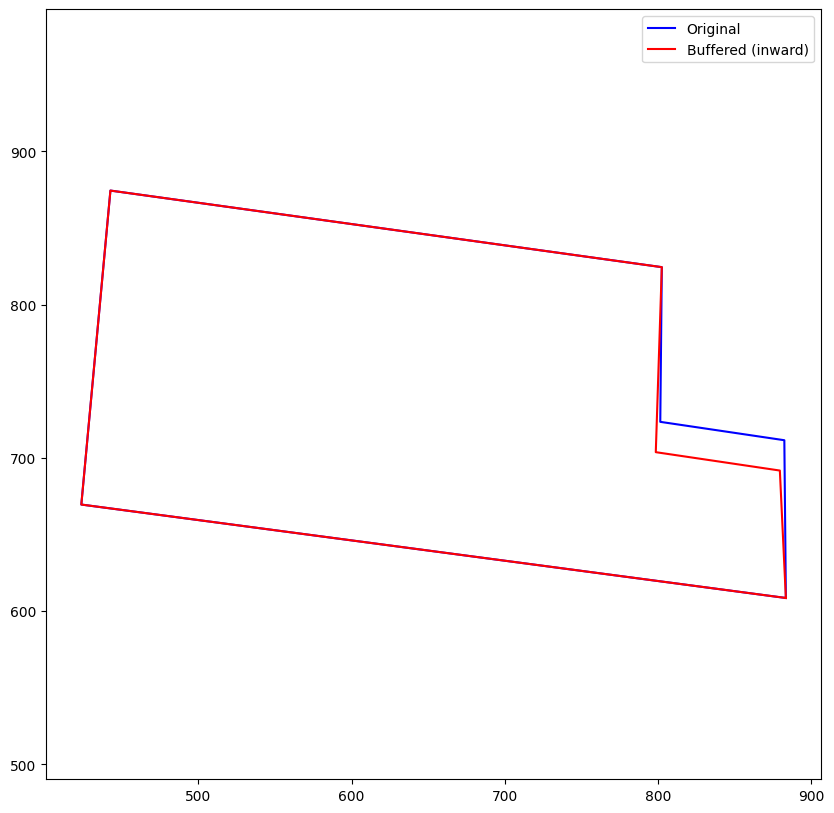

In [6]:
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt


points = [
    [883.3486009327115, 608.5942704863425],
    [423.65506329113924, 669.5536309127248],
    [442.6424050632911, 874.417055296469],
    [802.4025649566955, 824.4503664223851],
    [801.4032311792138, 723.5176548967355],
    [882.3492671552298, 711.5256495669553],
    [883.3486009327115, 608.5942704863425],
]





original_polygon = Polygon(points)

side_start_idx = 4  
side_end_idx = 5  

side_start = points[side_start_idx]
side_end = points[side_end_idx]



def normalized_vector(side_start , side_end):
    side_vector = np.array(side_end) - np.array(side_start)
    normal = np.array([-side_vector[1], side_vector[0]])
    return normal / np.linalg.norm(normal)


buffer_distance = -20


def new_polygon_points(side_start_point , side_start_idx , side_end_point , side_end_idx , buffer_distance , polygon_points):
    normalized_value = normalized_vector(side_start_point , side_end_point)
    offset_start = np.array(side_start_point) + buffer_distance * normalized_value
    offset_end = np.array(side_end_point) + buffer_distance * normalized_value
    new_points = polygon_points.copy()
    new_points[side_start_idx] = offset_start.tolist()
    new_points[side_end_idx] = offset_end.tolist()
    return new_points



new_points = new_polygon_points(side_start , side_start_idx , side_end , side_end_idx , buffer_distance , points )
buffered_polygon = Polygon(new_points)

plt.figure(figsize=(10, 10))
x, y = original_polygon.exterior.xy
plt.plot(x, y, 'b-', label='Original')
x, y = buffered_polygon.exterior.xy
plt.plot(x, y, 'r-', label='Buffered (inward)')
plt.axis('equal')
plt.legend()
plt.show()

[-0.99995287 -0.00970828]
[[903.3476584034337, 608.7884360928543], [423.65506329113924, 669.5536309127248], [442.6424050632911, 874.417055296469], [802.4025649566955, 824.4503664223851], [801.4032311792138, 723.5176548967355], [902.3483246259519, 711.7198151734672], [883.3486009327115, 608.5942704863425]]


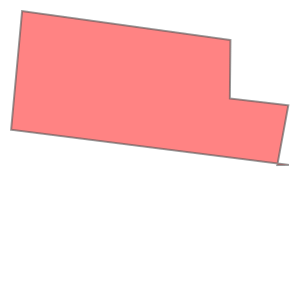

In [4]:
data  = {
   "roof_plane_pts":[
      [
         883.3486009327115,
         608.5942704863425
      ],
      [
         423.65506329113924,
         669.5536309127248
      ],
      [
         442.6424050632911,
         874.417055296469
      ],
      [
         802.4025649566955,
         824.4503664223851
      ],
      [
         801.4032311792138,
         723.5176548967355
      ],
      [
         882.3492671552298,
         711.5256495669553
      ],
      [
         883.3486009327115,
         608.5942704863425
      ]
   ],
   "buffer_distance":-20,
   "starting_point":[
      883.3486009327115,
      608.5942704863425
   ],
   "ending_point":[
      882.3492671552298,
      711.5256495669553
   ],
}

import numpy as np
from shapely import Polygon
polygon_points : list  = data.get("roof_plane_pts")
buffer_distance = data.get("buffer_distance")
starting_point = data.get("starting_point", None)
ending_point = data.get("ending_point", None)
starting_index = polygon_points.index(starting_point)
ending_index = polygon_points.index(ending_point)

def normalized_vector(side_start , side_end):
    side_vector = np.array(side_end) - np.array(side_start)
    normal = np.array([-side_vector[1], side_vector[0]])
    return normal / np.linalg.norm(normal)



def new_polygon_points(side_start_point , side_start_idx , side_end_point , side_end_idx , buffer_distance , polygon_points):
    normalized_value = normalized_vector(side_start_point , side_end_point)

    print(normalized_value)
    offset_start = np.array(side_start_point) + buffer_distance * normalized_value
    offset_end = np.array(side_end_point) + buffer_distance * normalized_value
    new_points = polygon_points.copy()
    new_points[side_start_idx] = offset_start.tolist()
    new_points[side_end_idx] = offset_end.tolist()
    print(new_points)
    return new_points



new_points = new_polygon_points(
        starting_point,
        starting_index,
        ending_point,
        ending_index,
        buffer_distance,
        polygon_points,
    )
buffered_polygon = Polygon(new_points)


buffered_polygon